In [16]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Q1. How many records?
1154112

In [17]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df.shape

(1154112, 7)

## Q2. Average trip duration in January?
19.16

In [18]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.duration.mean()

19.167224093791006

### How many records did you drop?
44286

<AxesSubplot:xlabel='duration'>

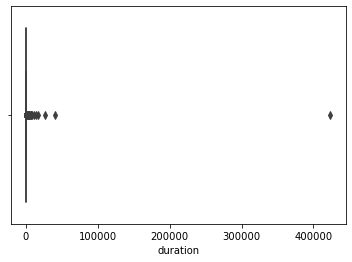

In [19]:
sns.boxplot(data=df, x="duration")

In [20]:
mask = (df.duration >= 1) & (df.duration <= 60)
recs_before = df.shape[0]
df = df[mask]
recs_after = df.shape[0]
print(recs_before - recs_after)

44286


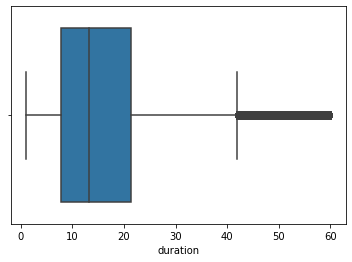

In [21]:
sns.boxplot(data=df, x="duration");

## Q3. What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)
83%

In [22]:
df.PUlocationID.isna().sum() / df.shape[0]

0.8352732770722617

In [23]:
df.loc[:, "PUlocationID"] = df.PUlocationID.fillna(-1)
df.loc[:, "DOlocationID"] = df.DOlocationID.fillna(-1)

## Q4. What's the dimensionality of this matrix?
525

In [24]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape[1]

525

## Q5. What's the RMSE on train?
10.52

In [25]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

10.528519405285056

## Q6. What's the RMSE on validation?
12.85

In [26]:
df_val = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val.loc[:, "PUlocationID"] = df_val.PUlocationID.fillna(-1)
df_val.loc[:, "DOlocationID"] = df_val.DOlocationID.fillna(-1)

mask = (df_val.duration >= 1) & (df_val.duration <= 60)
df_val = df_val[mask]
y_val = df_val[target]

val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)
y_val_pred = lr.predict(X_val)
mean_squared_error(y_val, y_val_pred, squared=False)

12.853320457057634